# 퍼셉트론(Perceptron)
- 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 고안한 알고리즘
- 퍼셉트론은 딥러닝의 기원이 되는 알고리즘임
- 다수의 신호를 입력으로 받아 하나의 신호를 출력함

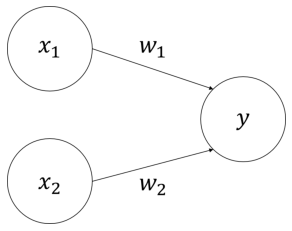

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = plt.imread('perceptron.png')
plt.axes().axis('off') 
imgplot = plt.imshow(img)

#### 그림 1. 입력이 2개인 퍼셉트론

- 그림 1은 2개의 입력을 받은 퍼셉트론의 예시이다.
- x1, x2는 입력 신호, y는 출력 신호, w1과 w2는 가중치이다.  
- 그림 1의 원은 노드라고 부르며 입력 신호가 뉴런에 보내질 때, 가중치가 곱해진다 (w1x1, w2x2).
- 노드에서 보낸 신호의 총합이 입계값을 넘어설 때 1을 출력한다. 여기서 임계값은 θ(theta, 세타)로 나타낸다.

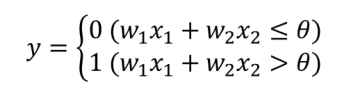

In [2]:
img = plt.imread('perceptron_formula.png')
plt.axes().axis('off') 
imgplot = plt.imshow(img)

#### 그림 2. 퍼셉트론 수식

- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치(θ)를 부여한다.
- 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용한다.
- 가중치가 클수록 해당 신호가 중요하다는 것을 뜻한다.

# 단순 논리 회로
## AND 게이트

|x1|x2|**y**|
|--|--|--|
|0|0|**0**|
|1|0|**0**|
|0|1|**0**|
|1|1|**1**|

- AND 게이트는 2개의 입력을 받고 1개의 출력을 갖는 논리 회로임
- 2개의 입력 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력

## NAND 게이트

|x1|x2|**y**|
|--|--|--|
|0|0|**1**|
|1|0|**1**|
|0|1|**1**|
|1|1|**0**|

- 이름 그대로 AND 게이트의 NOT을 적용한 논리 회로임
- 2개의 입력 모두 1일 때문 0을 출력하고, 그 외에는 1을 출력

## OR 게이트

|x1|x2|**y**|
|--|--|--|
|0|0|**0**|
|1|0|**1**|
|0|1|**1**|
|1|1|**1**|

- 2개의 입력 신호 중 하나 이상이 1이면 1, 그 외에는 0을 출력

### 정리
- 위와 같이 퍼셉트론으로 AND, NAND, OR 게이트를 표현할 수 있음을 확인하였음
- 퍼셉트론의 구조는 AND, NAND, OR 게이트에서 똑같음
- 단, 매개변수(가중치, 임계값)의 값만 다를 뿐임

# 퍼셉트론 구현하기
## AND 게이트

In [4]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [5]:
AND(0, 0) # 0
AND(1, 0) # 0
AND(0, 1) # 0
AND(1, 1) # 1

1

## 가중치와 편향 도입
- 앞서 정의한 식의 임계값(theta)를 -b로 치환하면 다음과 같은 식이 도출됨

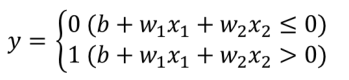

In [6]:
img = plt.imread('perceptron_formula_2.png')
plt.axes().axis('off') 
imgplot = plt.imshow(img)

#### 그림 3. 퍼셉트론 식

- b를 편향(bias)라고 함
- 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력

In [7]:
import numpy as np

# 가중치와 편향이 도입된 AND 게이트
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b # 퍼셉트론 식
    if tmp <= 0:
        return 0
    else:
        return 1

- 가중치 (Weight)는 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수
- 편향 (Bias)은 뉴런이 얼마나 쉽게 활성화(1) 하느냐를 조정하는 매개변수

In [13]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) #AND와 가중치 및 편향이 다름
    b = 0.7
    tmp = np.sum(w*x)+b # 퍼셉트론 식
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) #AND와 편향만 다름
    b = -0.2
    tmp = np.sum(w*x)+b # 퍼셉트론 식
    if tmp <= 0:
        return 0
    else:
        return 1

# 퍼셉트론의 한계
## XOR 게이트

- XOR 게이트는 배타적 논리합 논리 회로
- x1, x2 중 한쪽이 1일 때만 1을 출력

|x1|x2|**y**|
|--|--|--|
|0|0|**0**|
|1|0|**1**|
|0|1|**1**|
|1|1|**0**|

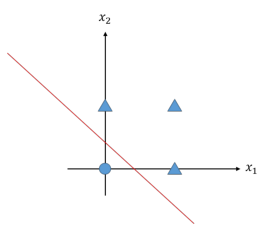

In [8]:
img = plt.imread('OR_gate.png')
plt.axes().axis('off') 
imgplot = plt.imshow(img)

#### 그림 4. 선형 문제 해결

- 연산을 통해 출력되는 값이 (0인 경우 : 원형, 1인 경우 : 세모)
- OR게이트는 하나의 직선을 통해 충분히 나눌 수 있음

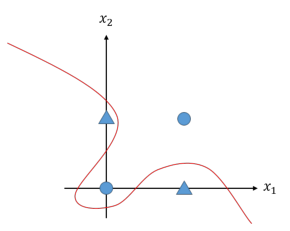

In [9]:
img = plt.imread('XOR_gate.png')
plt.axes().axis('off') 
imgplot = plt.imshow(img)

#### 그림 5. 비선형 문제 해결

- XOR 게이트는 직선으로 나눌 수 없음
- 하지만, 곡선으로 나누는 것이 가능함
- 이는 머신러닝 분야에서 비선형 문제를 풀었다고 볼 수 있음

# 다층 퍼셉트론
- 퍼셉트론으로는 XOR 게이트를 표현하지 못함
- 퍼셉트론을 층으로 쌓아 다층 퍼셉트론을 만들 수 있음

## AND, NAND, OR 게이트 합성
- 기존의 게이트를 조합하여 XOR 게이트를 구현할 수 있음

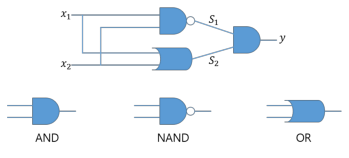

In [11]:
img = plt.imread('XOR_gate_2.png')
plt.axes().axis('off') 
imgplot = plt.imshow(img)

#### 그림 6. XOR 게이트 구현

|x1|x2|s1|s2|**y**|
|--|--|--|--|--|
|0|0|1|0|**0**|
|1|0|1|1|**1**|
|0|1|1|1|**1**|
|1|1|0|1|**0**|

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [19]:
XOR(0,0) #0
XOR(1,0) #1
XOR(0,1) #1
XOR(1,1) #0

0

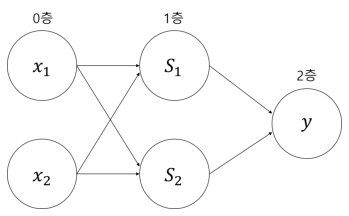

In [20]:
img = plt.imread('multilayer_perceptron.png')
plt.axes().axis('off') 
imgplot = plt.imshow(img)

#### 그림 7. 다층 퍼셉트론 (2-Layer)

- 위의 그림과 같이 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라 함
- 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보냄
- 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 입력 신호를 바탕으로 y를 출력 함

# 정리

- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 가중치(Weight)와 편향(Bias)을 매개변수로 설정한다.
- 퍼셉트론으로 AND, OR, NAND 게이트 논리 회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로 표현할 수 없다.
- 다층 퍼셉트론을 활용하여 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 선형 영역, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.

# Reference
- 밑바닥부터 시작하는 딥러닝, 사이토 고키, 한빛미디어, 2017
- https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py
- https://matplotlib.org/stable/api/axes_api.html